
<h2 style="color:darkBlue;">Final Project for Python Programming course</h2>
<p><img src="https://miro.medium.com/max/2400/1*2QVeenJ2bdiA_9N8qvPiPA.png" alt="Breast Cancer Awarness" width="100" height="200" align="left"><br>Breast Cancer Diagnostic Dataset Anaysis<br>Khobar, Nov 2019<br><p3>
<p><br><br>Group 3 Members:<p>
<p style="color:darkBlue;">Maha Alshammari<br>Danah AlJar<br>Bashayer Alhammad</p>


<h2>Library used:</h2>

<ul>
  <li><b>NumPy</b> (Numerical Python) is the fundamental package for numerical computation in Python.</li>
  <li><b>Pandas</b> (Python data analysis) is a must in the data science life cycle. It is heavily used for data analysis and cleaning.</li>
  <li> <b>Matplotlib</b> has powerful yet beautiful visualizations. It’s a plotting library for Python which can be used to embed those plots into applications.</li>
    <li><b>Seaborn</b> is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.</li>
</ul> 


<h2>Dataset Information:</h2>

<p>In this project, we worked on a very famous and real dataset on Breast Cancer Wisconsin (Diagnostic). The dataset is available on <a href="https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data">Breast Cancer Wisconsin (Diagnostic)</a>. The dataset is available on kaggle and originally belong to <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29">UCI Machine Learning Repository.</a></p>
<p>Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. </p>

<h2>Attribute Information:</h2>
<p>1)ID number<br>
2) Diagnosis (<b>M</b> = malignant,<b>B</b> = benign)<br>
3-32) Ten real-valued features are computed for each cell nucleus:<br>
<pre></pre>a) radius (mean of distances from center to points on the perimeter) <br>
b) texture (standard deviation of gray-scale values) <br>
c) perimeter <br>
d) area <br>
e) smoothness (local variation in radius lengths) <br>
f) compactness (perimeter^2 / area - 1.0) <br>
g) concavity (severity of concave portions of the contour) <br>
h) concave points (number of concave portions of the contour) <br>
i) symmetry <br>
j) fractal dimension ("coastline approximation" - 1)<br>
</p>

<h2>Preprocessing the Data<h2>

In [1]:
# important imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the .csv file
b_cancer = pd.read_csv('Breast_Cancer_Diagnostic.csv')

In [3]:
#To get the size of the data
b_cancer.shape

(569, 32)

In [4]:
#To show a sample of the data
b_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,?,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# To know more about the type of data we are dealing with
b_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               568 non-null object
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             568 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              566 non-null float64
fractal_dimension_mean     565 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              567 non-null float64
compactness_se             567 non-null float64
concavity_se               564 non-

In [6]:
#To get an overview about the data
b_cancer.describe()

,id,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,568.000000,569.000000,566.000000,565.000000,...,568.000000,569.000000,569.000000,569.000000,569.000000,566.000000,566.000000,567.000000,567.000000,567.000000
mean,3.037183e+07,14.127292,91.969033,654.889104,0.096360,0.104341,0.088590,0.048919,0.181023,0.062793,...,16.274840,25.677223,107.261213,880.583128,0.132369,0.252320,0.271710,0.114481,0.290162,0.083840
std,1.250206e+08,3.524049,24.298981,351.914129,0.014064,0.052813,0.079633,0.038803,0.027387,0.007021,...,4.835621,6.146258,33.602542,569.356993,0.022832,0.153604,0.208319,0.065803,0.061935,0.017921
min,8.670000e+03,6.981000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,75.170000,420.300000,0.086370,0.064920,0.029540,0.020310,0.161900,0.057800,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.146300,0.114425,0.064530,0.250450,0.071365
50%,9.060240e+05,13.370000,86.240000,551.100000,0.095870,0.092630,0.061400,0.033500,0.179150,0.061550,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211750,0.226550,0.099750,0.282200,0.079990
75%,8.813129e+06,15.780000,104.100000,782.700000,0.105300,0.130400,0.129650,0.074000,0.195550,0.066120,...,18.795000,29.720000,125.400000,1084.000000,0.146000,0.336450,0.382400,0.161350,0.318150,0.092070
max,9.113205e+08,28.110000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,0.937900,1.252000,0.291000,0.663800,0.207500


In [7]:
#To check the missing data
b_cancer.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               1
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             1
concave points_mean        0
symmetry_mean              3
fractal_dimension_mean     4
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              2
compactness_se             2
concavity_se               5
concave points_se          0
symmetry_se                1
fractal_dimension_se       0
radius_worst               1
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          3
concavity_worst            3
concave points_worst       2
symmetry_worst             2
fractal_dimension_worst    2
dtype: int64

In [8]:
#Some of the data shows "?" instead of "NaN", This method converts the '?' to 'NaN'
b_cancer['texture_mean']=pd.to_numeric(b_cancer['texture_mean'],errors='coerce')
b_cancer['texture_mean'].dtype

dtype('float64')

<h2>Cleaning the Data<h2>

#We can see that some of the number of missing data increased
b_cancer.isnull().sum()

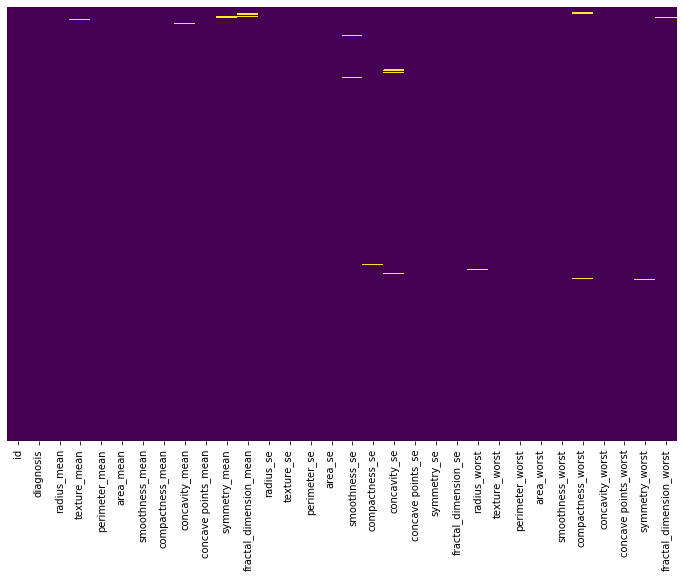

In [10]:
#The figure shows the missing data.
plt.figure(figsize = (12,8))
sns.heatmap(data = b_cancer.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [11]:
#ID and diagnosis was dropped because it doesn't effect predication 
list = ['id','diagnosis']
features = b_cancer.drop(list,axis = 1,inplace = False)
missing_data= features.isnull().sum().sum()
percentage_missing_data=(missing_data/features.size)*100
print('The percentage of missing values in the dataset is: ',percentage_missing_data.round(2),'%')

The percentage of missing values in the dataset is:  0.19 %


In [12]:
def diagnosis_value(diagnosis):
    if diagnosis =='M':
        return 1
    else: return 0
b_cancer['diagnosis']=b_cancer['diagnosis'].apply(diagnosis_value)

In [13]:
#list = ['id','diagnosis']
#features = b_cancer.drop(list,axis = 1,inplace = False)
b_cancer_malignant = b_cancer[b_cancer["diagnosis"] == 1]
b_cancer_benign = b_cancer[b_cancer["diagnosis"] == 0]

In [14]:
#Fill in the missing data with the mean of each feature
for item in b_cancer:
    b_cancer[item].fillna(b_cancer[item].mean(), inplace=True)   
b_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,19.30291,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77000,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25000,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38000,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34000,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39000,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25000,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08000,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33000,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
#Re-check that there is no missing data
b_cancer.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

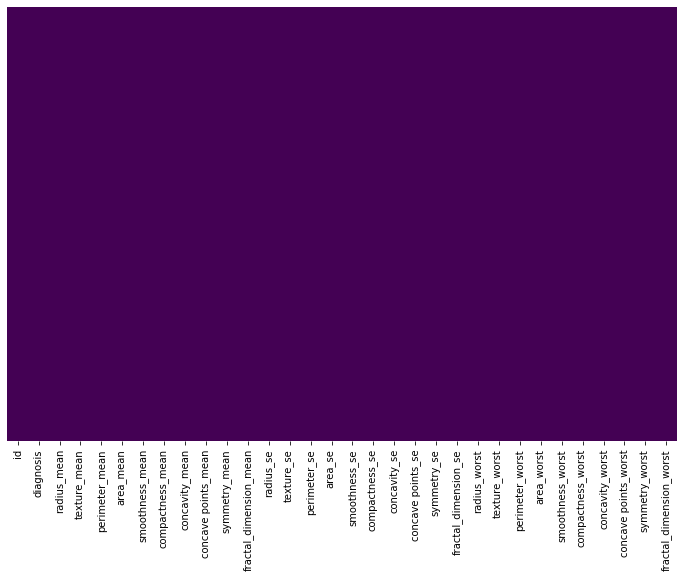

In [16]:
#A figure to approve that the data is clean now
plt.figure(figsize = (12,8))
sns.heatmap(data = b_cancer.isnull(),  yticklabels=False, cbar=False,cmap='viridis')

<h2>Data Visualization<h2>

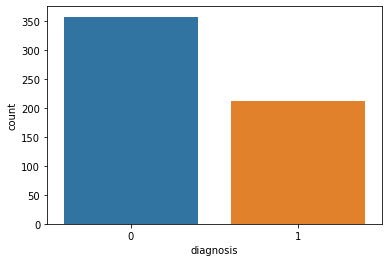

In [17]:
#A figure that shows the types of breast cancer
sns.countplot(x='diagnosis', data=b_cancer)

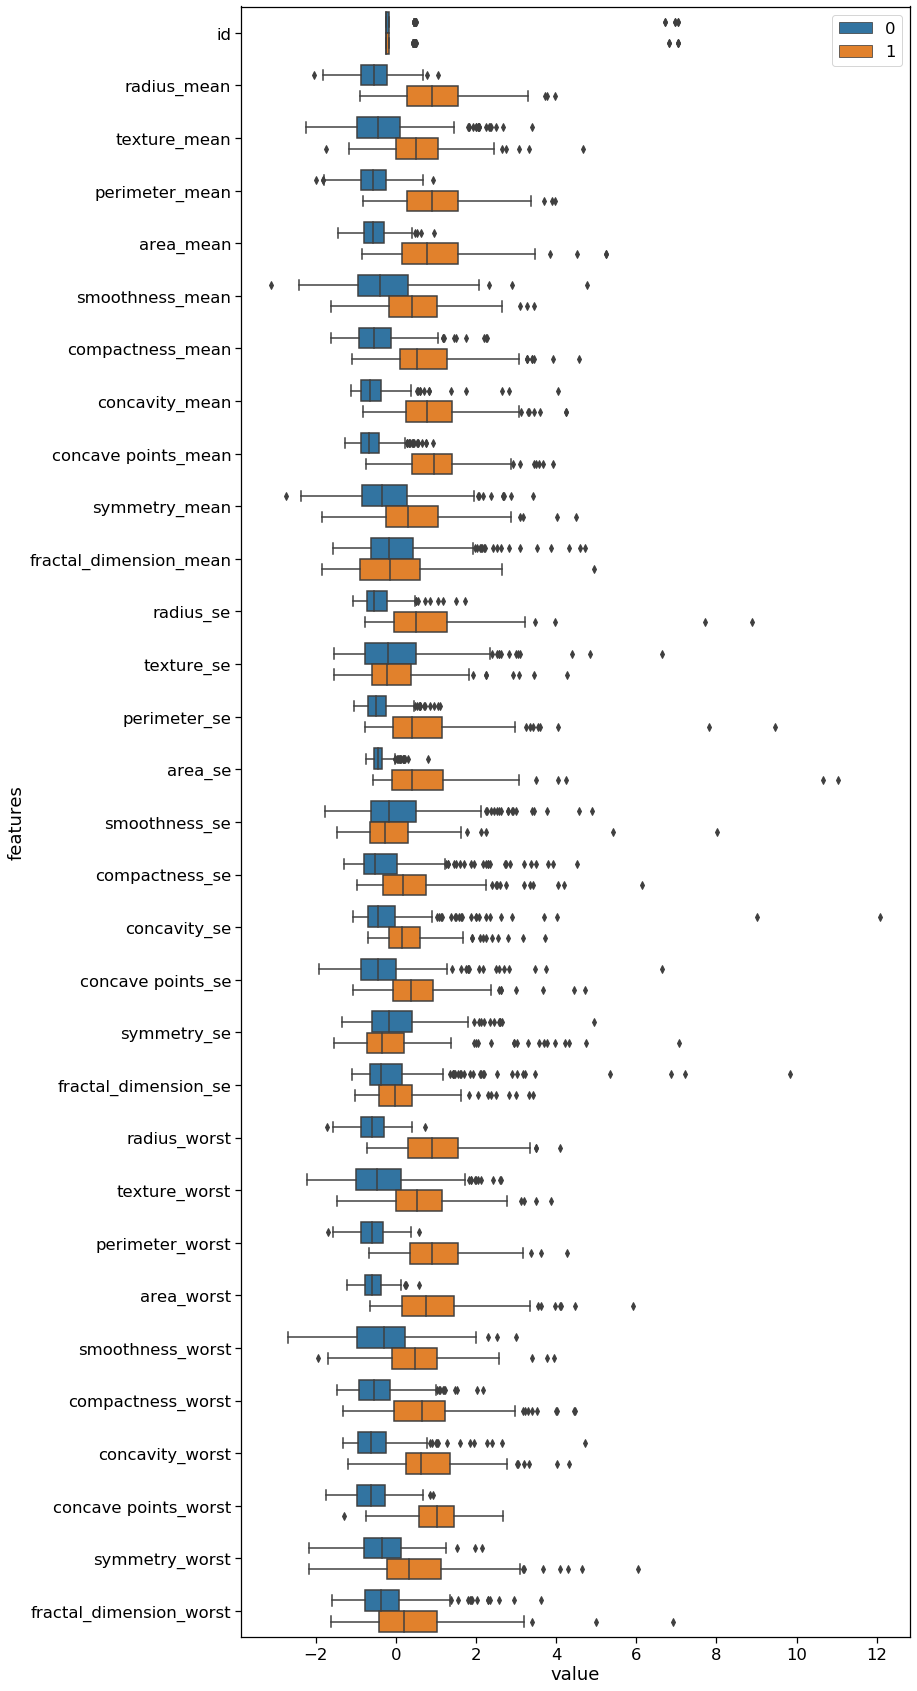

In [18]:
#dropping the diagnosis from the data set
features = b_cancer.drop(['diagnosis'],axis = 1,inplace = False)
y = b_cancer.diagnosis 
x= features
data_dia = y
data = x 
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,:]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
#ploting the figure
plt.figure(figsize=(12,30))
sns.set_context('notebook', font_scale=1.5)
sns.boxplot(x="value", y="features", hue="diagnosis", data=data)
plt.legend(loc='best');

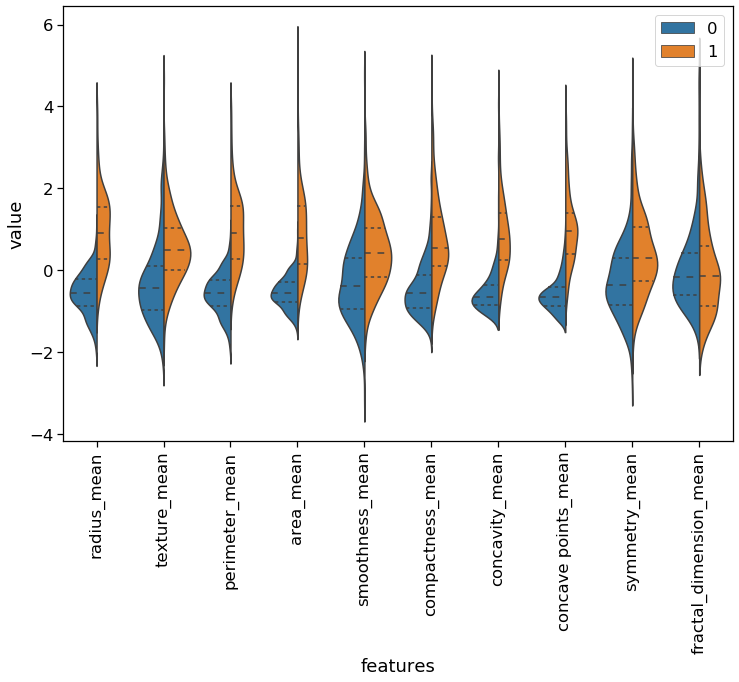

In [30]:
#ploting the figure of only the means
data = pd.concat([y,data_n_2.iloc[:,1:11]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(12,8))
sns.set_context('notebook', font_scale=1.5)
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, 
               inner="quart")
#where to locate the legend 
plt.legend(loc='best');
#to rotate x axis 
plt.xticks(rotation=90);

From this plot we can conclude that the texture_mean feature of the Malignant and Benign looks like seperated, so it can be taken as a good classification feature.While fractal_dimension_mean we can’t use for classification between the two types.

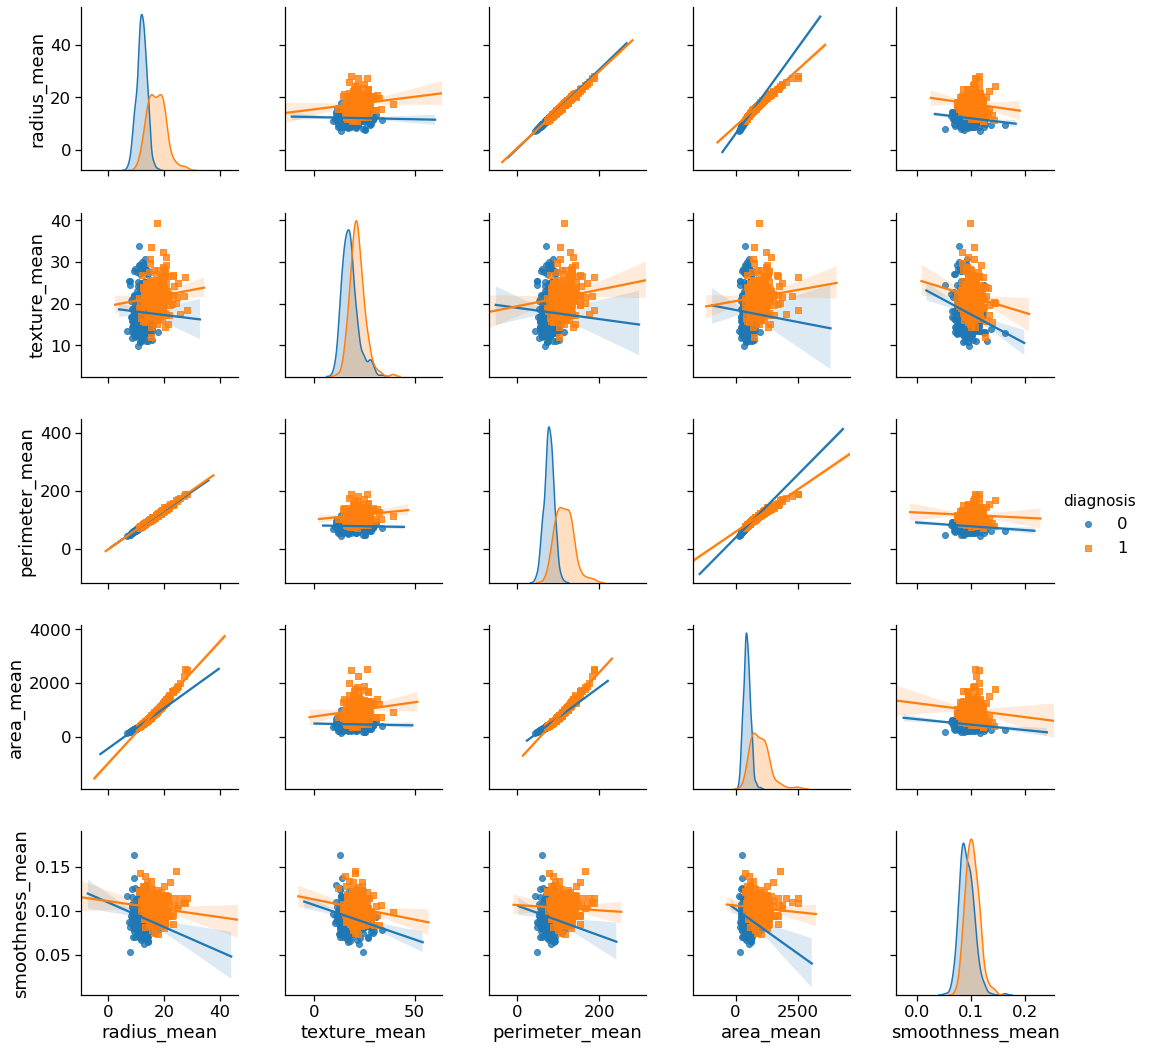

In [20]:
sns.pairplot(b_cancer, vars=b_cancer.columns[2:7], hue='diagnosis', markers=['o', 's'], size=3, kind='reg')
plt.show()

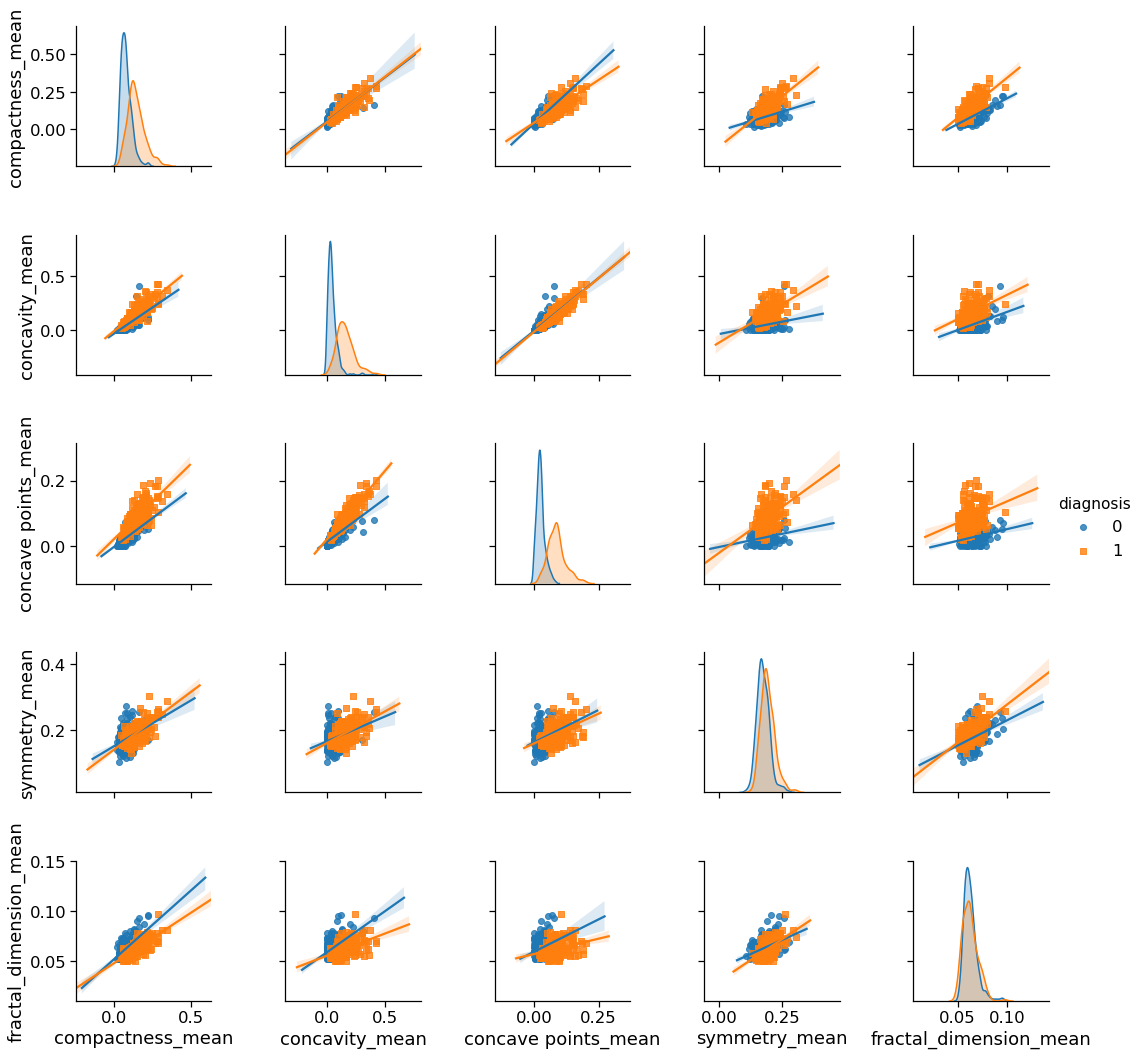

In [25]:
sns.pairplot(b_cancer, vars=b_cancer.columns[7:12], hue='diagnosis', markers=['o', 's'], size=3, kind='reg')
plt.show()

<h2>Data Correlation<h2>

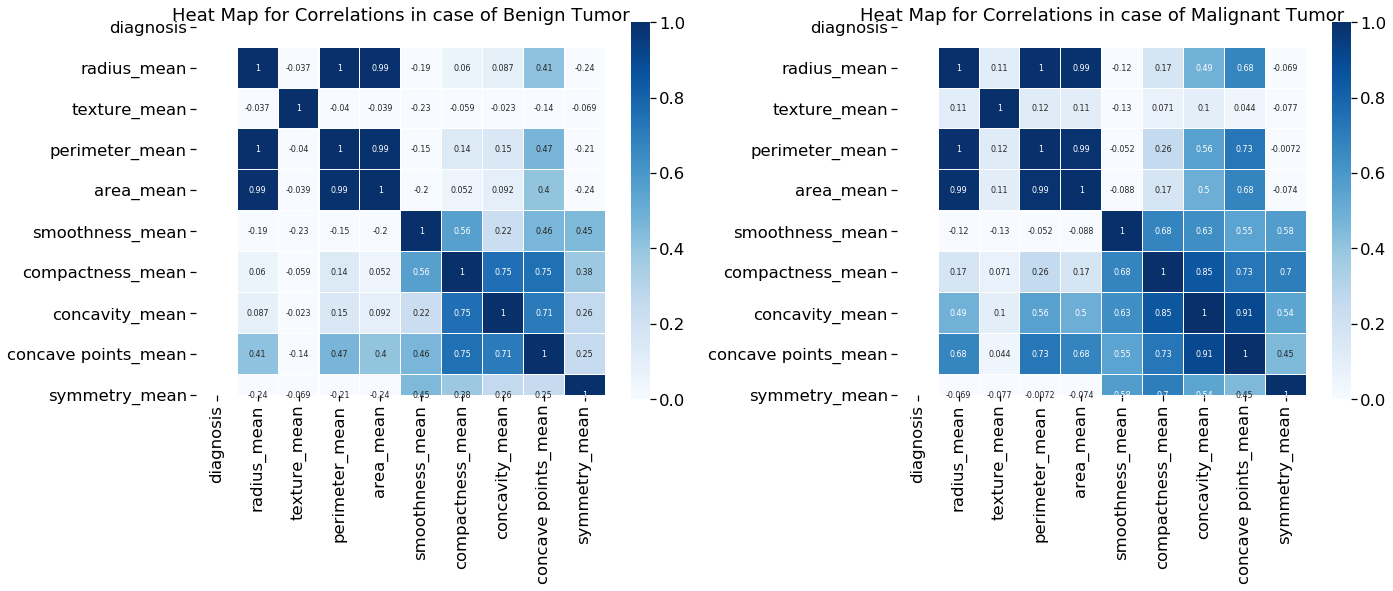

In [21]:
plt.rcParams['figure.figsize'] = (20,8)
fig, (ax1, ax2) = plt.subplots(1,2)
sns.heatmap(b_cancer_benign.iloc[:,1:11].corr(), cmap = 'Blues', vmin=features.values.min(), vmax=1, square=True, 
        linewidths=0.1, annot=True, annot_kws={"size":8},  ax=ax1)

sns.heatmap(b_cancer_malignant.iloc[:,1:11].corr(), cmap = 'Blues', vmin=features.values.min(), vmax=1, square=True, 
 
            linewidths=0.1, annot=True, annot_kws={"size":8},  ax=ax2);
ax1.title.set_text('Heat Map for Correlations in case of Benign Tumor')
ax2.title.set_text('Heat Map for Correlations in case of Malignant Tumor')
plt.tight_layout()        

concave points and concavity show strong correlation with radius,primeter,area,and smoothness in the case of malignant tumor.

<h3>Conclusion</h3>
<p>From this data we can conclude that the concavity_mean and the radius_mean can give a better prediction about the type of the tumor.</p>